# Independence analysis with IBAMR
---

In this notebook, we estimate the independence of the numerical solution, obtained with IBAMR and reported in our manuscript, with respect to (1) the exit criterion for the iterative solvers, (2) the CFL-based time-increment size, and (3) the spatial discretization of the AMR grid.

All computations were carried out on the University HPC cluster with the open-source software [IBAMR](https://github.com/IBAMR/IBAMR).
We used the version of IBAMR tagged [`snake-repro`](https://github.com/mesnardo/IBAMR/releases/tag/snake-repro), the linear algebra library [`PETSc-3.5.2`](https://www.mcs.anl.gov/petsc/download/index.html), `OpenMPI-1.8`, `gcc-4.7.0`, `SAMRAI-2.4.4`, `HDF5-1.8.13`, and `SILO-4.10`.

---
_Warnings:_

1. Some cells in this notebook requires the numerical solution of the flying-snake simulations.
If you do not have the solution, skip the cell and execute the following one to see the results.

2. Python post-processing scripts to plot the figures make use of the package `snake`, available on [GitHub](https://github.com/mesnardo/snake).
---

In [1]:
import os
import sys
%matplotlib inline

from IPython.display import Image 

import snake

In [ ]:
print('Python version: {}'.format(sys.version))
print('snake version: {}'.format(snake.__version__))

Last time we ran this notebook, the output of the cell above was:
```
Python version: 2.7.12 |Anaconda 2.5.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
snake version: 0.1.2
```

---
## Using more stringent exit criterion for the iterative solvers
---

In our manuscript, we report the numerical solution, obtained with IBAMR, of the flying-snake problem at Reynolds numbers 1000 and 2000 for various angles-of-attack.
These simulations used an exit criterion for the iterative solvers based on the default relative tolerance of PETSc ($10^{-6}$).

Here, we compare the force coefficients at Reynolds number 2000 and angle-of-attack 35 degrees, previously obtained with default relative tolerances, with those when tightening the exit criterion.
Specifically, we drecreased the relative tolerances of the iterative solvers by 4 orders of magnitude ($10^{-10}$).
(Other simulation parameters remain identical.)

The next cell executes a Python script named `plotForceCoefficientsCompareRTol.py` that requires the numerical solution from the two simulations.
In the folder `iterativeErrors`, we provide all input files necessary to re-run these simulations (they are located in the sub-folders `rtol6` and `rtol10`) and a `README` file that details the simulations.
If you do not have the numerical solutions, you can skip the next cell and jump directly to the next one to visualize the force coefficients we obtained.

In [ ]:
# WARNING: execute this cell if you have the numerical solutions
script = os.path.join('iterativeError',
                      'plotForceCoefficientsCompareRTol.py')
%run $script

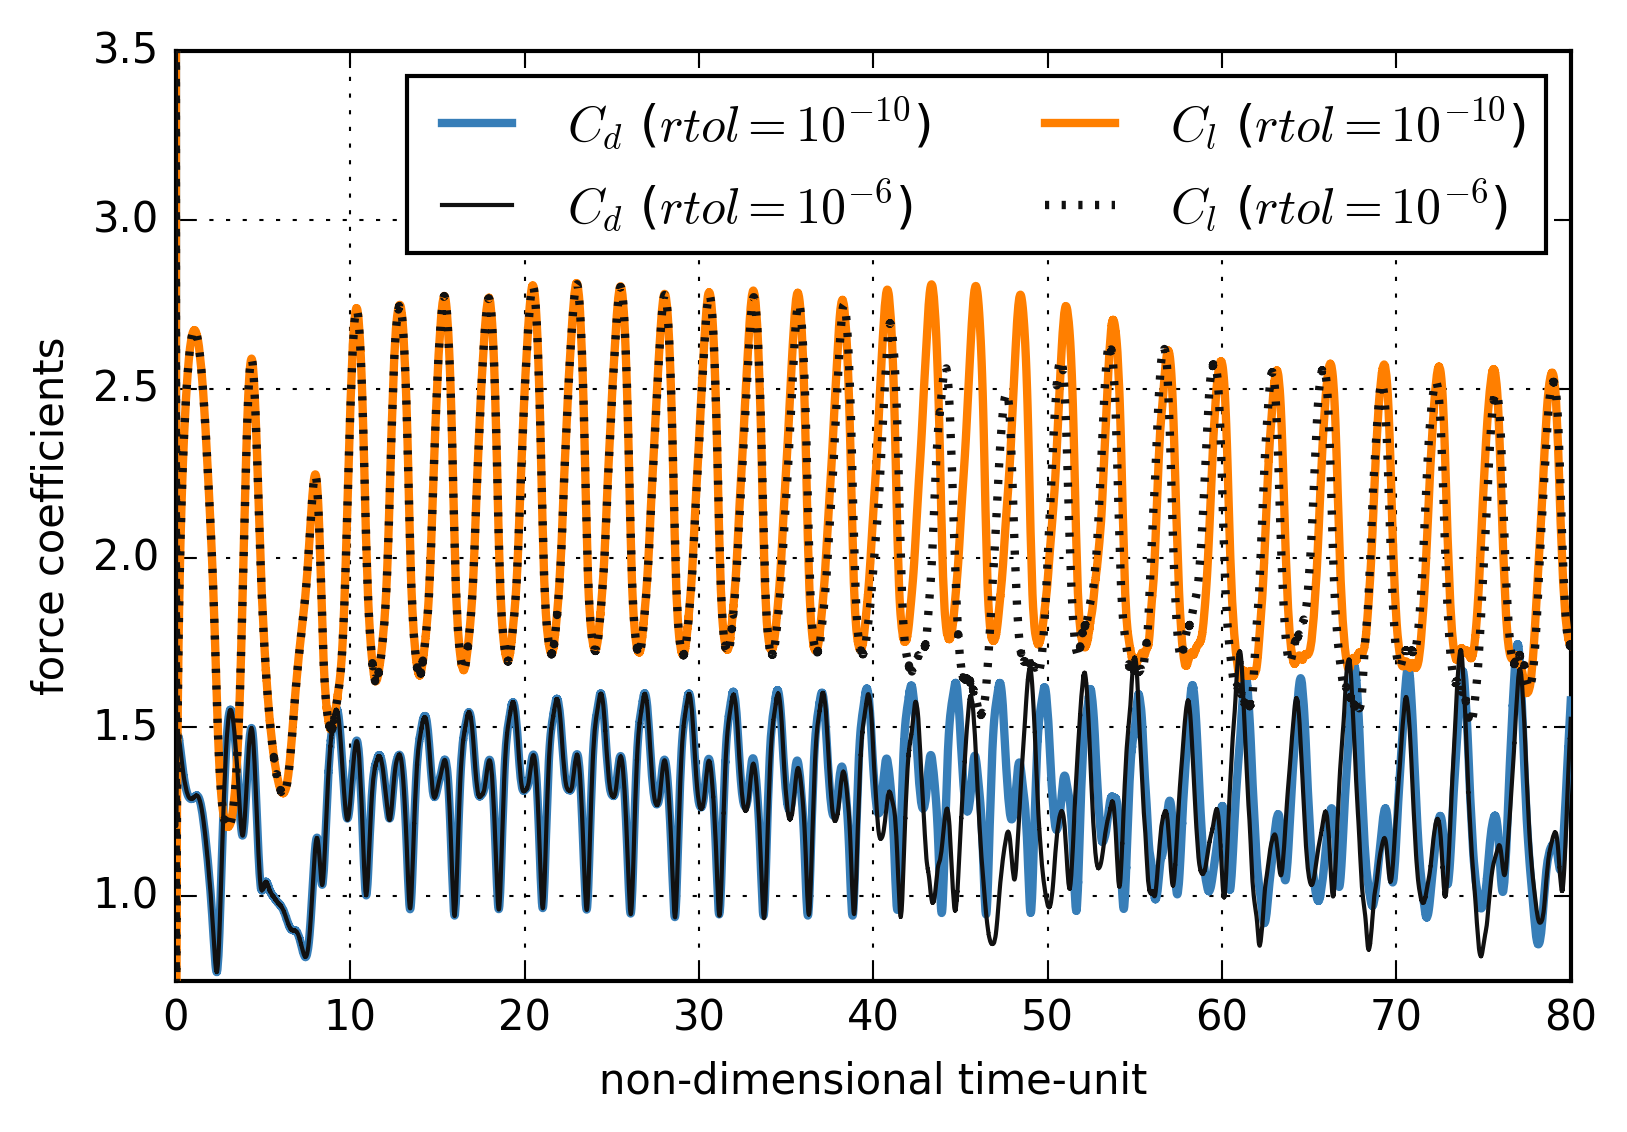

In [2]:
Image(os.path.join('iterativeError',
                   'forceCoefficientsCompareRTol.png'))

Looking at the instantaneous force coefficients (see figure above), we observed the mean lift coefficient drops over the course of the simulation in both cases.
However, the drop does not start at the same time-unit.
The force coefficients closely match up to 40 time-units of flow-simulation and seem to converge to the same mean value over the end of the run.

When we average the force coefficients between 32 and 64 time-units (as it was done in Krishnan et al., 2014), we get:

| rtol | Avg. $C_d$ | $\Delta C_d / C_d$ | Avg. $C_l$ | $\Delta C_l / C_l$ |
|:-:|:-:|:-:|:-:|:-:|
| $10^{-6}$ | $1.2558$ |  | $2.0580$ |  |
| $10^{-10}$ | $1.3015$ | $+3.64\%$ | $2.1575$ | $+4.83\%$ |

---
## Using a smaller CFL constraint
---

With IBAMR, the size of the time-increment is dynamically computed during the simulation, based on a given CFL constraint.
When we used a CFL value of $0.3$, we observed a drop in the mean force coefficients at Reynolds number 2000 and angle-of-attack 35 degrees, thus, affecting the quantity we are trying to replicate from our previous study: the lift coefficient averaged between 32 and 64 time-units.
Here, we report the results obtained similar simulation parameters, except we lowered the CFL value to $0.1$.

The next cell executes a Python script named `plotForceCoefficientsCompareCFL.py` located in the folder `temporalError`.
This script reads the forces from the two simulations (with different CFL constraints), thus, requires the solutions to be computed.
In the sub-folders `cfl0.3` and `cfl0.1` located in the same directory, we provide all the input files necessary to re-run the simulations.
In addition, a `README` file details information about the runs.
In case you do not have the numerical solutions, you can skip the next cell and execute the one after to visualize the force coefficients we obtained.

In [ ]:
# WARNING: execute this cell if you have the numerical solutions
script = os.path.join('temporalError',
                      'plotForceCoefficientsCompareCFL.py')
%run $script

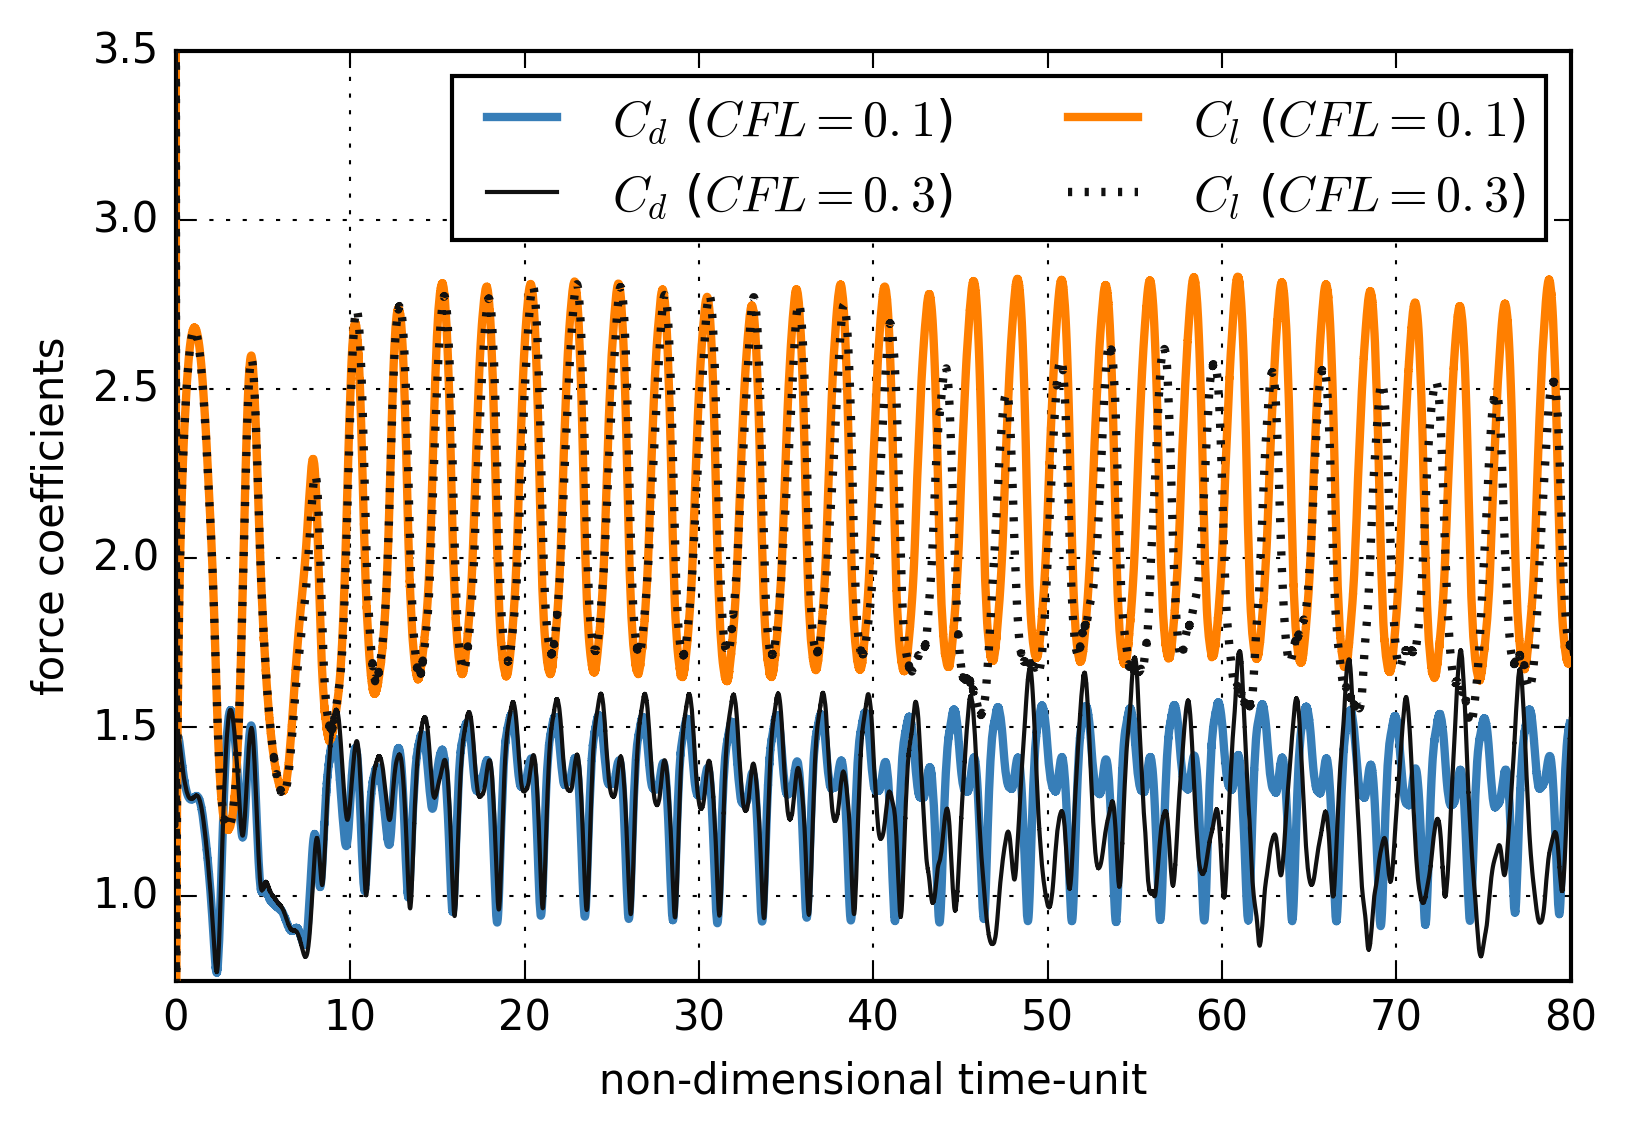

In [3]:
Image(os.path.join('temporalError',
                   'forceCoefficientsCompareCFL.png'))

From the figure above, we see that the drop in the mean lift coefficient disappeared when tightening the CFL constraint: with a CFL value of $0.1$, we reach a steady periodic regime over the entire run, while maintaining a high mean lift coefficient.

When we average the force coefficients between 32 and 64 time-units, we get:

| CFL | Avg. $C_d$ | $\Delta C_d / C_d$ | Avg. $C_l$ | $\Delta C_l / C_l$ |
|:-:|:-:|:-:|:-:|:-:|
| $0.3$ | $1.2558$ |  | $2.0580$ |  |
| $0.1$ | $1.3282$ | $+5.77\%$ | $2.2285$ | $+8.28\%$ |

We added the numerical solution obtained with a tighter CFL constraint to our manuscript during the revision process.

---
## Grid independence
---

Our manuscript reports the instantaneous force coefficients acting on a flying-snake cross-section at Reynolds number 1000 and 2000 and for different angles-of-attack.
The solutions were computed on a AMR grid where the smallest grid-spacing is $h=0.004$ (value used in our previous study with cuIBM).
Here, we compare the force coefficients to those obtained on a finer AMR grid with minimal grid-spacing $h=0.002$.
(Other simulation parameters remain identical.)

The next cell executes a Python script called `plotForceCoefficientsCompareMeshes.py`, located in the folder `gridIndependence`, that requires the numerical solution on the two mesh-grids.
In the sub-folders `h0.004` and `h0.002`, we provide all the input files necessary to re-run these simulations.
Also, a `README` file, in the same directory, details the procedure to run the simulations.
If you do not have the numerical solutions, you can skip the next cell and jump to the nex one to visualize the force coefficients we obtained.

In [ ]:
# WARNING: execute this cell if you have the numerical solutions
script = os.path.join('gridIndependence',
                      'plotForceCoefficientsCompareMeshes.py')
%run $script

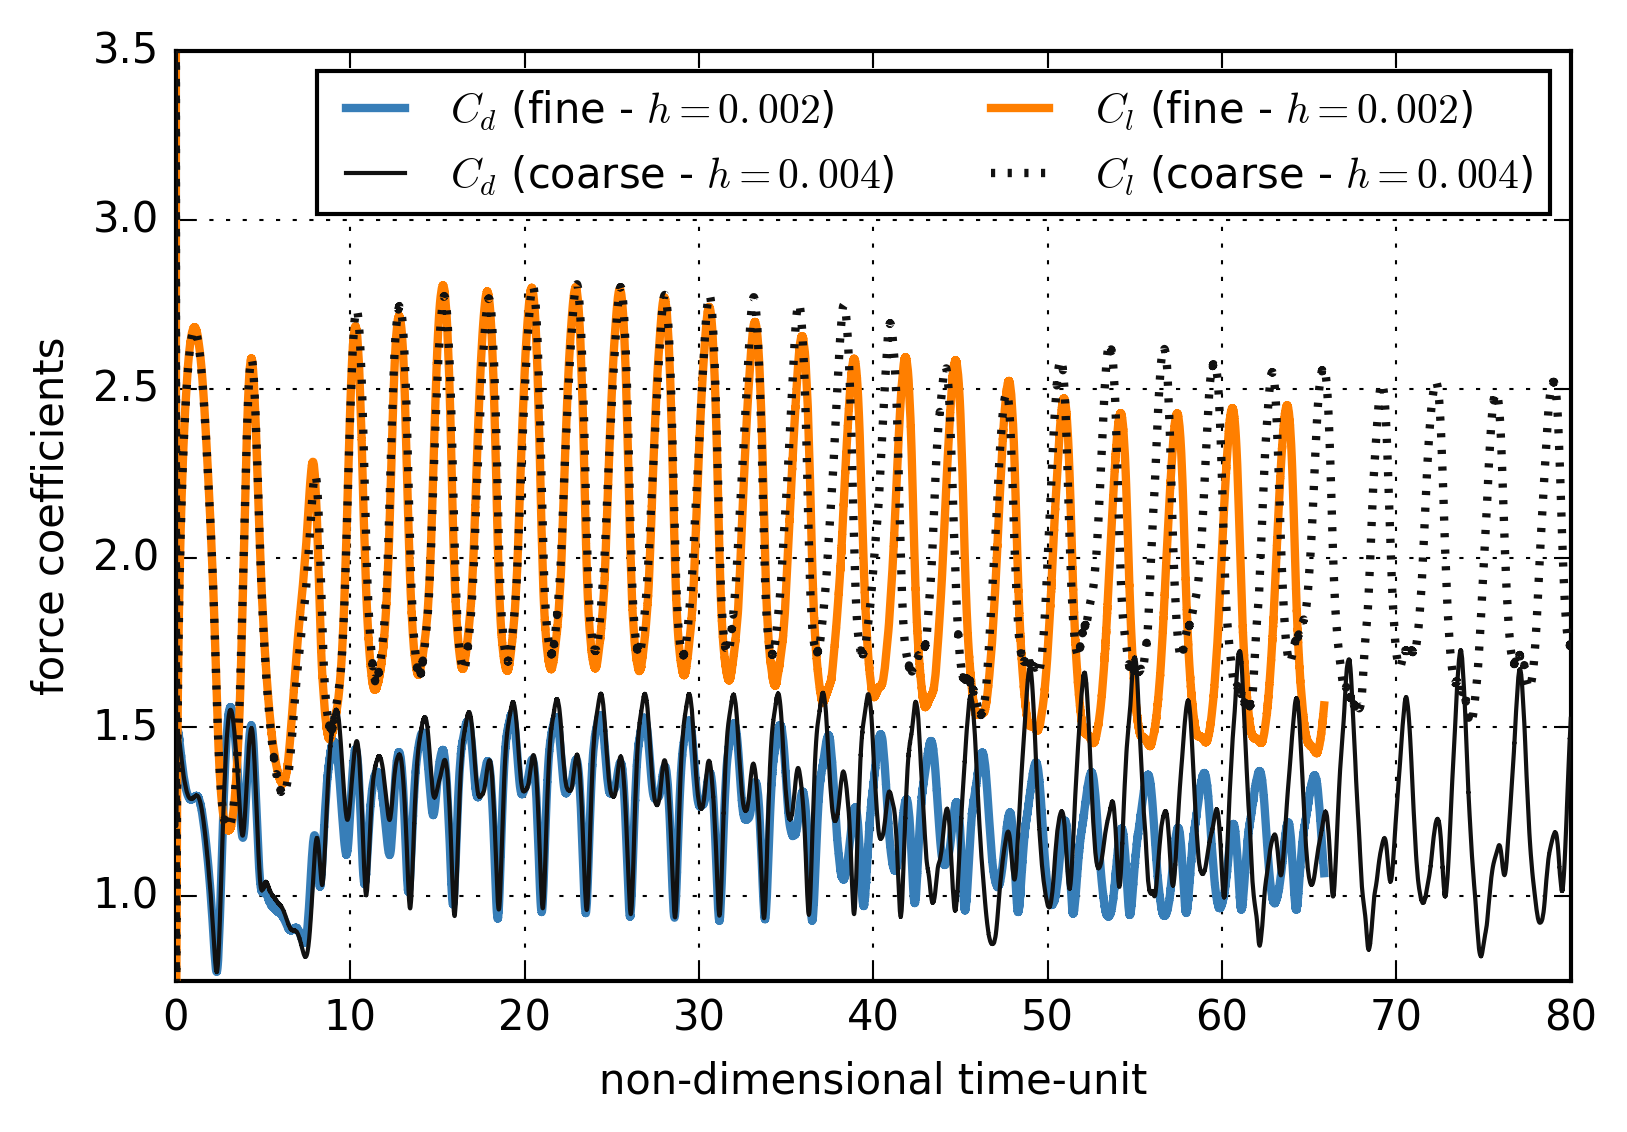

In [4]:
Image(os.path.join('gridIndependence',
                   'forceCoefficientsCompareMeshes.png'))

The instantaneous lift coefficient from the two simulations present some discrepancies but exhibit a similar trend: a gentle drop in the mean value.

When we average the force coefficients between 32 and 64 time-units, we get:

| h | Avg. $C_d$ | $\Delta C_d / C_d$ | Avg. $C_l$ | $\Delta C_l / C_l$ |
|:-:|:-:|:-:|:-:|:-:|
| $0.004$ | $1.2558$ |  | $2.0580$ |  |
| $0.002$ | $1.1850$ | $-5.64\%$ | $1.9318$ | $-6.13\%$ |


---
#### References:

* Krishnan, A., Socha, J. J., Vlachos, P. P., & Barba, L. A. (2014). Lift and wakes of flying snakes. Physics of Fluids (1994-present), 26(3), 031901.

---